In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

samples = ["HCC-5A","HCC-5B","HCC-5C","HCC-5D"]
experiment_name = 'LICA'
input_dir = 'G:/dataset/05-LICA/input/'

In [2]:
region = pd.read_csv(input_dir + 'HCC-5region-anno.txt', sep="\t")
print(region)

             comb.barcode sample.ident           barcode   region
0        AAACAAGTATCTCCCA       HCC-5A  AAACAAGTATCTCCCA  Stromal
1        AAACACCAATAACTGC       HCC-5A  AAACACCAATAACTGC    Tumor
2        AAACAGAGCGACTCCT       HCC-5A  AAACAGAGCGACTCCT    Tumor
3        AAACAGCTTTCAGAAG       HCC-5A  AAACAGCTTTCAGAAG    Tumor
4        AAACAGGGTCTATATT       HCC-5A  AAACAGGGTCTATATT    Tumor
...                   ...          ...               ...      ...
15259  TTGTTTCACATCCAGG.3       HCC-5D  TTGTTTCACATCCAGG    Tumor
15260  TTGTTTCATTAGTCTA.3       HCC-5D  TTGTTTCATTAGTCTA   Normal
15261  TTGTTTCCATACAACT.3       HCC-5D  TTGTTTCCATACAACT    Tumor
15262    TTGTTTGTATTACACG       HCC-5D  TTGTTTGTATTACACG   Normal
15263  TTGTTTGTGTAAATTC.1       HCC-5D  TTGTTTGTGTAAATTC    Tumor

[15264 rows x 4 columns]


In [4]:
region['region'].value_counts(normalize=True)

Tumor      0.668698
Stromal    0.190710
Normal     0.137906
Immune     0.002686
Name: region, dtype: float64

In [3]:
for sample in samples:
    df = region[region['sample.ident']==sample]
    df = df.set_index('barcode')
    df.rename(index=lambda s: s+'-1', inplace=True)
    print(df.shape)

(3437, 3)
(3942, 3)
(3580, 3)
(4305, 3)


AnnData object with n_obs × n_vars = 3460 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'row', 'col', 'imagerow', 'imagecol', 'celltype', 'batch', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 3958 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'row', 'col', 'imagerow', 'imagecol', 'celltype', 'batch', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 3777 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'row', 'col', 'imagerow', 'imagecol', 'celltype', 'batch', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 4352 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'row', 'col', 'imagerow', 'imagecol', 'celltype', 'batch', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 's

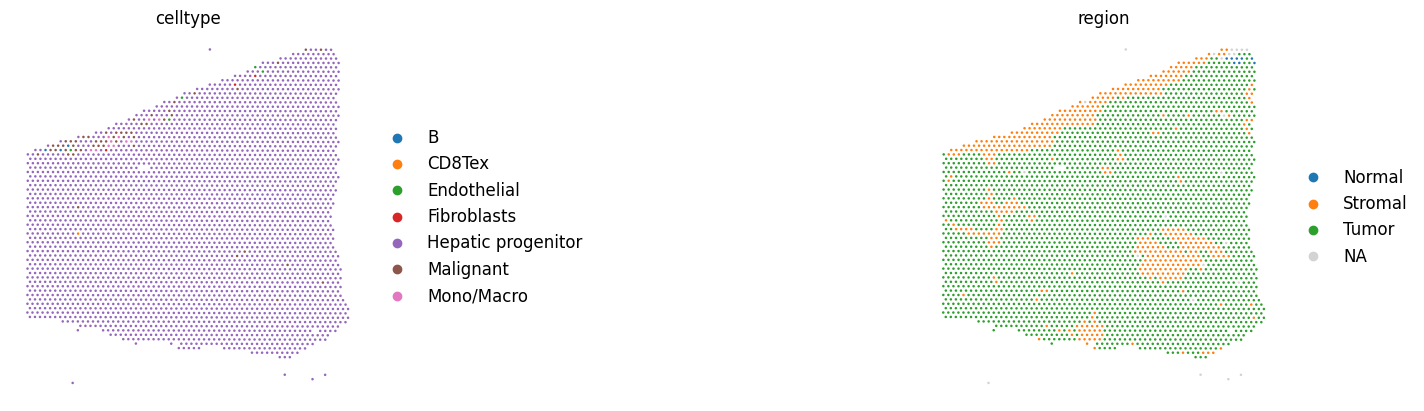

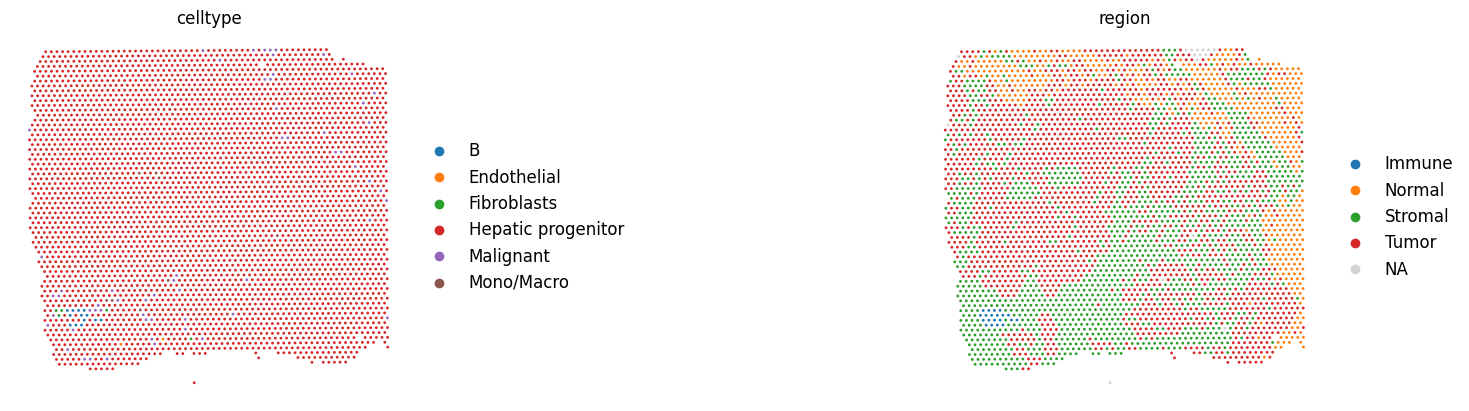

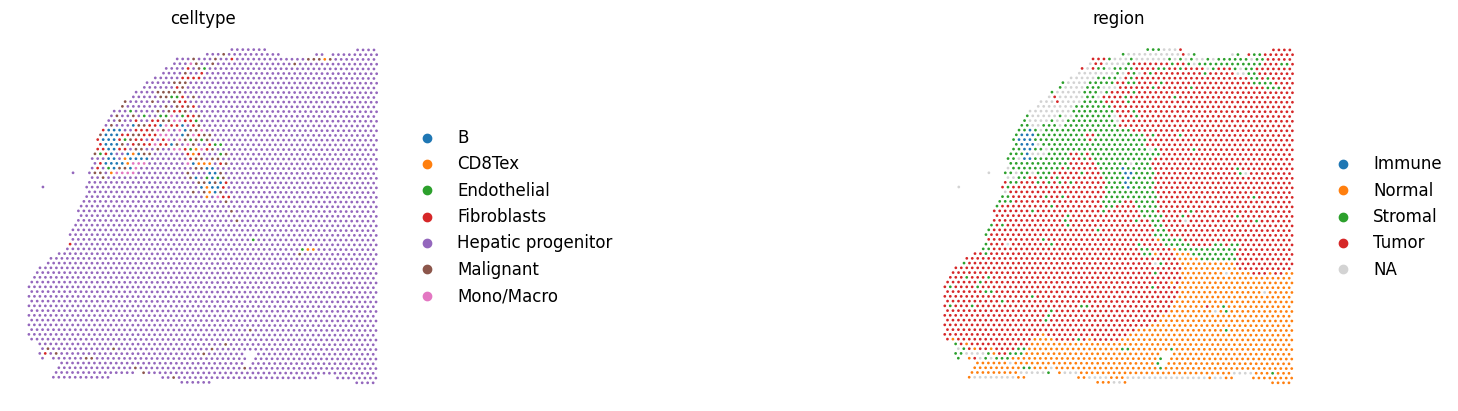

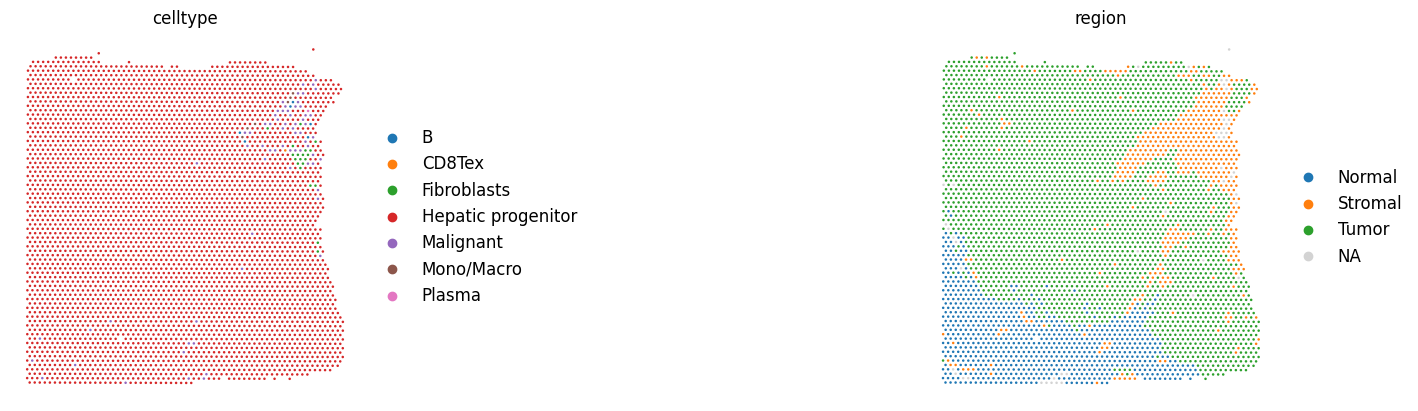

In [35]:
for sample in samples:
    file_path = input_dir+sample+'.h5ad'
    adata_temp = sc.read_h5ad(file_path)
    print(adata_temp)
    sc.pl.spatial(adata_temp, color=['celltype', 'region'], ncols=2,
                  wspace=0.5, show=False, legend_fontsize=12, legend_fontoutline=2, frameon=False, 
                  img_key=None, spot_size=100)

In [5]:
for sample in samples:
    file_path = input_dir+sample
    adata_temp = sc.read_visium(file_path)
    adata_temp.var_names_make_unique()
    adata_temp.obs_names_make_unique()
    adata_temp.obs['batch'] = sample
#     print(adata_temp)
#     print(adata_temp.obs_names[:5])
    
    df = region[region['sample.ident']==sample]
    df = df.set_index('barcode')
    df.rename(index=lambda s: s+'-1', inplace=True)
    adata_temp.obs = pd.merge(adata_temp.obs,df[['region']],how='left', left_index=True, right_index=True)
    print(adata_temp.obs)
    adata_temp.write_h5ad(input_dir + sample + '.h5ad')
    

D:\anaconda\envs\index\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\index\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                    in_tissue  array_row  array_col   batch   region
AAACAAGTATCTCCCA-1          1         50        102  HCC-5A  Stromal
AAACACCAATAACTGC-1          1         59         19  HCC-5A    Tumor
AAACAGAGCGACTCCT-1          1         14         94  HCC-5A    Tumor
AAACAGCTTTCAGAAG-1          1         43          9  HCC-5A    Tumor
AAACAGGGTCTATATT-1          1         47         13  HCC-5A    Tumor
...                       ...        ...        ...     ...      ...
TTGTTCAGTGTGCTAC-1          1         24         64  HCC-5A    Tumor
TTGTTGTGTGTCAAGA-1          1         31         77  HCC-5A    Tumor
TTGTTTCACATCCAGG-1          1         58         42  HCC-5A    Tumor
TTGTTTCATTAGTCTA-1          1         60         30  HCC-5A    Tumor
TTGTTTCCATACAACT-1          1         45         27  HCC-5A    Tumor

[3460 rows x 5 columns]


D:\anaconda\envs\index\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\index\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                    in_tissue  array_row  array_col   batch   region
AAACAACGAATAGTTC-1          1          0         16  HCC-5B    Tumor
AAACAAGTATCTCCCA-1          1         50        102  HCC-5B    Tumor
AAACAATCTACTAGCA-1          1          3         43  HCC-5B  Stromal
AAACACCAATAACTGC-1          1         59         19  HCC-5B  Stromal
AAACAGAGCGACTCCT-1          1         14         94  HCC-5B   Normal
...                       ...        ...        ...     ...      ...
TTGTTGTGTGTCAAGA-1          1         31         77  HCC-5B  Stromal
TTGTTTCACATCCAGG-1          1         58         42  HCC-5B  Stromal
TTGTTTCATTAGTCTA-1          1         60         30  HCC-5B    Tumor
TTGTTTCCATACAACT-1          1         45         27  HCC-5B  Stromal
TTGTTTGTGTAAATTC-1          1          7         51  HCC-5B    Tumor

[3958 rows x 5 columns]


D:\anaconda\envs\index\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\index\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                    in_tissue  array_row  array_col   batch  region
AAACAAGTATCTCCCA-1          1         50        102  HCC-5C  Normal
AAACACCAATAACTGC-1          1         59         19  HCC-5C   Tumor
AAACAGAGCGACTCCT-1          1         14         94  HCC-5C   Tumor
AAACAGGGTCTATATT-1          1         47         13  HCC-5C   Tumor
AAACATGGTGAGAGGA-1          1         62          0  HCC-5C   Tumor
...                       ...        ...        ...     ...     ...
TTGTTGTGTGTCAAGA-1          1         31         77  HCC-5C   Tumor
TTGTTTCACATCCAGG-1          1         58         42  HCC-5C   Tumor
TTGTTTCATTAGTCTA-1          1         60         30  HCC-5C   Tumor
TTGTTTCCATACAACT-1          1         45         27  HCC-5C   Tumor
TTGTTTGTGTAAATTC-1          1          7         51  HCC-5C     NaN

[3777 rows x 5 columns]


D:\anaconda\envs\index\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\index\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


                    in_tissue  array_row  array_col   batch  region
AAACAAGTATCTCCCA-1          1         50        102  HCC-5D   Tumor
AAACACCAATAACTGC-1          1         59         19  HCC-5D  Normal
AAACAGAGCGACTCCT-1          1         14         94  HCC-5D   Tumor
AAACAGCTTTCAGAAG-1          1         43          9  HCC-5D   Tumor
AAACAGGGTCTATATT-1          1         47         13  HCC-5D   Tumor
...                       ...        ...        ...     ...     ...
TTGTTTCACATCCAGG-1          1         58         42  HCC-5D   Tumor
TTGTTTCATTAGTCTA-1          1         60         30  HCC-5D  Normal
TTGTTTCCATACAACT-1          1         45         27  HCC-5D   Tumor
TTGTTTGTATTACACG-1          1         73         41  HCC-5D  Normal
TTGTTTGTGTAAATTC-1          1          7         51  HCC-5D   Tumor

[4352 rows x 5 columns]
